In [1]:
!python --version

Python 3.10.5


In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_df = pd.read_csv("Loan_Prediction.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
x = loan_df.drop("Loan_Status",axis=1)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [4]:
y = loan_df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# 3 EDA
- 3.1 Missing Values and outliers
- 3.2 Datatypes conversions
- 3.3 Corr
- 3.4 Encoding (LeE or OhE)
- 3.5 Distribution >> Balanced, Imbalanced, Skewness


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
(loan_df.isna().sum() / len(loan_df))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan_df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002643,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [10]:
loan_df['Gender'].isna().sum()

13

In [11]:
loan_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
loan_df['Gender'].mode()[0]

'Male'

In [13]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)


In [14]:
loan_df['Gender'].isna().sum()

0

In [15]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace=True)
loan_df.isna().sum()

#loan_df['Dependents']
#loan_df['Self_Employed']
#loan_df['LoanAmount']
#loan_df['Loan_Amount_Term']
#loan_df['Credit_History']

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
loan_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002643,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [19]:
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace=True)
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace=True)
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean(),inplace=True)
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean(),inplace=True)
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Change Data Types

In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
loan_df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [27]:
loan_df['Gender'].value_counts().to_dict()

{'Male': 502, 'Female': 112}

In [28]:
loan_df['Gender'].replace({'Male': 0, 'Female': 1},inplace=True)

In [29]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
loan_df['Married'].value_counts().to_dict()

{'Yes': 401, 'No': 213}

In [31]:
loan_df['Married'].replace({'Yes': 0, 'No': 1},inplace=True)

In [32]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
loan_df['Dependents'].value_counts().to_dict()

{'0': 360, '1': 102, '2': 101, '3+': 51}

In [34]:
loan_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3},inplace=True)

In [35]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [36]:
loan_df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [37]:
loan_df['Education'].replace({'Graduate': 0, 'Not Graduate': 1},inplace=True)

In [38]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
loan_df['Self_Employed'].value_counts().to_dict()

{'No': 532, 'Yes': 82}

In [40]:
loan_df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)

In [41]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
loan_df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [43]:
loan_df['Property_Area'].replace({'Semiurban': 2, 'Urban': 1, 'Rural': 3},inplace=True)

In [44]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [45]:
x = loan_df.drop('Loan_Status',axis=1)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1
1,LP001003,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,3
2,LP001005,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1
4,LP001008,0,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,0,2900,0.0,71.000000,360.0,1.0,3
610,LP002979,0,0,3,0,0,4106,0.0,40.000000,180.0,1.0,3
611,LP002983,0,0,1,0,0,8072,240.0,253.000000,360.0,1.0,1
612,LP002984,0,0,2,0,0,7583,0.0,187.000000,360.0,1.0,1


In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [47]:
y = loan_df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [48]:
y.value_counts().to_dict()

{'Y': 422, 'N': 192}

In [49]:
y.replace({'Y': 1, 'N': 0},inplace=True)

In [50]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# le = LabelEncoder()
# x['Gender'] = le.fit_transform(x['Gender'])

In [53]:
import seaborn as sns

In [54]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

c:\Users\hp\.conda\envs\base1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

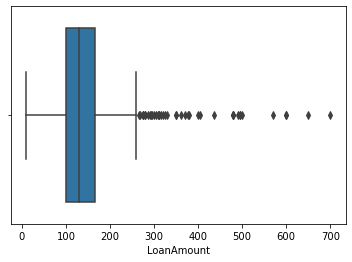

In [55]:
sns.boxplot(loan_df['LoanAmount'])

In [56]:
import matplotlib.pyplot as plt

<AxesSubplot:>

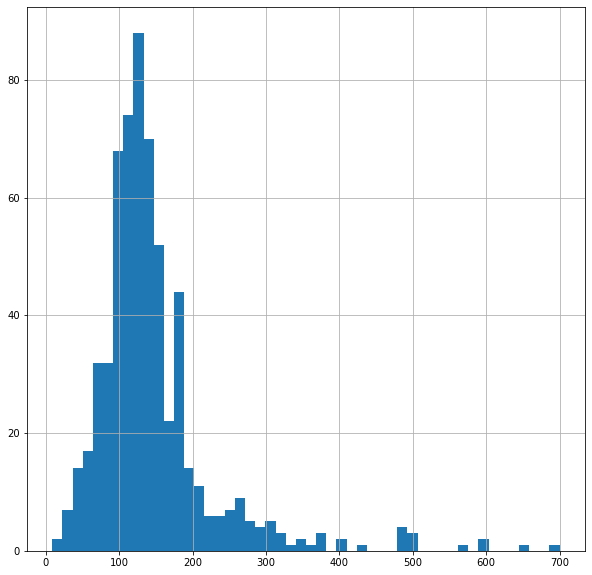

In [58]:
plt.figure(figsize=(10,10))
loan_df['LoanAmount'].hist(bins=50)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

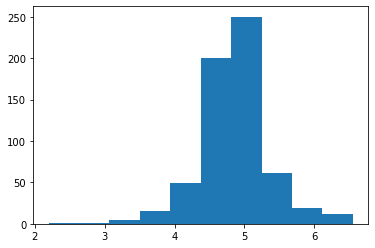

In [59]:
plt.hist(np.log(loan_df['LoanAmount']))

In [60]:
loan_df['log_LoanAmount'] = np.log(loan_df['LoanAmount'])


c:\Users\hp\.conda\envs\base1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_LoanAmount'>

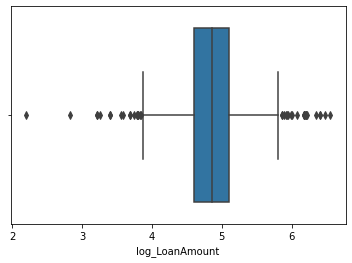

In [61]:
sns.boxplot(loan_df['log_LoanAmount'])

<AxesSubplot:xlabel='log_LoanAmount', ylabel='Count'>

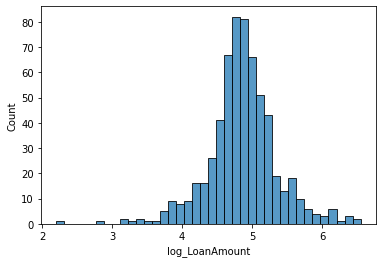

In [62]:
sns.histplot(loan_df['log_LoanAmount'])

<AxesSubplot:xlabel='log_LoanAmount', ylabel='Count'>

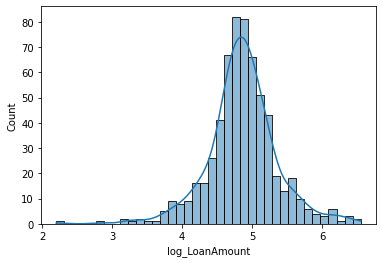

In [63]:
sns.histplot(loan_df['log_LoanAmount'],kde=True)

In [64]:
loan_df['log_LoanAmount'].mean()

4.862065665493133

In [65]:
loan_df['log_LoanAmount'].std()

0.49657468337900434

In [67]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount'],
      dtype='object')

In [69]:
loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Length: 614, dtype: float64

In [70]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64

c:\Users\hp\.conda\envs\base1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalIncome'>

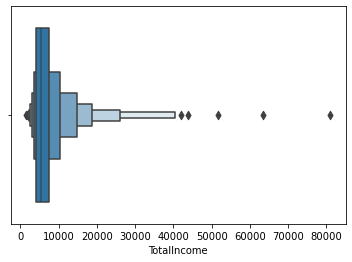

In [71]:
sns.boxenplot(loan_df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncome', ylabel='Count'>

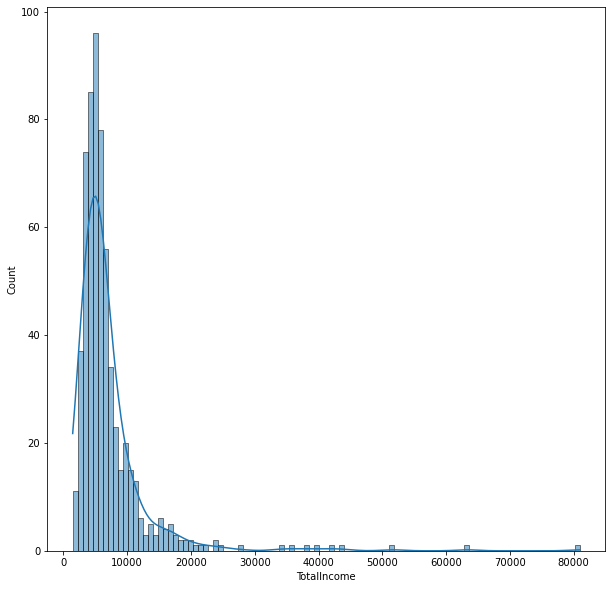

In [74]:
plt.figure(figsize =(10,10))
sns.histplot(loan_df['TotalIncome'],kde=True)

In [73]:
loan_df['TotalIncome'].mean()

7024.705081414722

<AxesSubplot:>

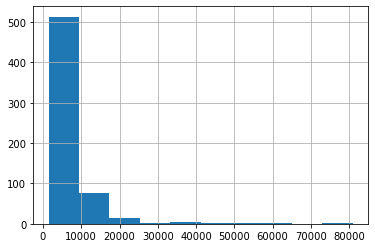

In [76]:
loan_df['TotalIncome'].hist()

In [78]:
loan_df['log_TotalIncome'] = np.log(loan_df['TotalIncome'])
loan_df['log_TotalIncome']

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: log_TotalIncome, Length: 614, dtype: float64

<AxesSubplot:>

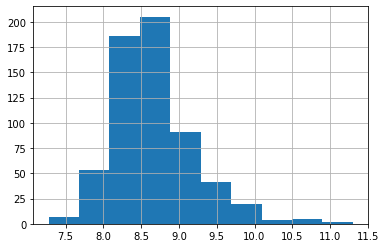

In [79]:
loan_df['log_TotalIncome'].hist()

c:\Users\hp\.conda\envs\base1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_TotalIncome'>

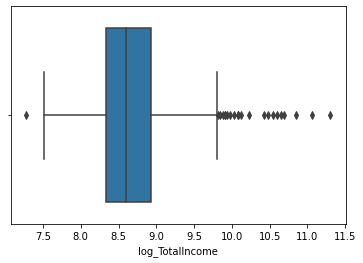

In [81]:
sns.boxplot(loan_df['log_TotalIncome'])

# Feature Selection

In [82]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount', 'TotalIncome', 'log_TotalIncome'],
      dtype='object')

In [83]:
loan_df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","TotalIncome"],axis=1,inplace=True)

In [84]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_TotalIncome
0,0,1,0,0,0,360.0,1.0,1,1,4.986426,8.674026
1,0,0,1,0,0,360.0,1.0,3,0,4.852030,8.714568
2,0,0,0,0,1,360.0,1.0,1,1,4.189655,8.006368
3,0,0,0,1,0,360.0,1.0,1,1,4.787492,8.505323
4,0,1,0,0,0,360.0,1.0,1,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,0,360.0,1.0,3,1,4.262680,7.972466
610,0,0,3,0,0,180.0,1.0,3,1,3.688879,8.320205
611,0,0,1,0,0,360.0,1.0,1,1,5.533389,9.025456
612,0,0,2,0,0,360.0,1.0,1,1,5.231109,8.933664


In [86]:
for i in loan_df.columns:
    if i not in ["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","TotalIncome"]:
        print(i)

Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
log_LoanAmount
log_TotalIncome


In [94]:
x = loan_df.drop('Loan_Status',axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_TotalIncome
0,0,1,0,0,0,360.0,1.0,1,4.986426,8.674026
1,0,0,1,0,0,360.0,1.0,3,4.852030,8.714568
2,0,0,0,0,1,360.0,1.0,1,4.189655,8.006368
3,0,0,0,1,0,360.0,1.0,1,4.787492,8.505323
4,0,1,0,0,0,360.0,1.0,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,0,360.0,1.0,3,4.262680,7.972466
610,0,0,3,0,0,180.0,1.0,3,3.688879,8.320205
611,0,0,1,0,0,360.0,1.0,1,5.533389,9.025456
612,0,0,2,0,0,360.0,1.0,1,5.231109,8.933664


In [112]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_TotalIncome
0,0,1,0,0,0,360.0,1.0,1,1,4.986426,8.674026
1,0,0,1,0,0,360.0,1.0,3,0,4.852030,8.714568
2,0,0,0,0,1,360.0,1.0,1,1,4.189655,8.006368
3,0,0,0,1,0,360.0,1.0,1,1,4.787492,8.505323
4,0,1,0,0,0,360.0,1.0,1,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,0,360.0,1.0,3,1,4.262680,7.972466
610,0,0,3,0,0,180.0,1.0,3,1,3.688879,8.320205
611,0,0,1,0,0,360.0,1.0,1,1,5.533389,9.025456
612,0,0,2,0,0,360.0,1.0,1,1,5.231109,8.933664


In [117]:
def ConvertToInt(col):
    list1 = []
    for i in col:
        list1.append(int(i))
    return list1

In [119]:
loan_df['Loan_Status'] = loan_df[['Loan_Status']].apply(ConvertToInt)

In [124]:
loan_df['Loan_Status'][0]

1

In [125]:
type(1)

int

In [108]:
y = loan_df[['Loan_Status']]
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Train Test Split

In [109]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')


logreg = LogisticRegression()
logreg.fit(x_train,y_train)


print(f"**************************Testing Evaluation**************************")
y_pred_test = logreg.predict(x_test)
acc = accuracy_score(y_pred_test,y_test)
print(f"Testing Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_test,y_test)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_test,y_test)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_test,y_test)
print(f"Recall Score = \n{rec}")



print(f"**************************Training Evaluation**************************")
y_pred_train = logreg.predict(x_train)
acc = accuracy_score(y_pred_train,y_train)
print(f"Training Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_train,y_train)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_train,y_train)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_train,y_train)
print(f"Recall Score = \n{rec}")

**************************Testing Evaluation**************************
Testing Accuracy Score = 
0.8373983739837398
Classification Report = 
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        18
           1       1.00      0.81      0.89       105

    accuracy                           0.84       123
   macro avg       0.74      0.90      0.77       123
weighted avg       0.92      0.84      0.86       123

Confusion Metrics = 
[[18  0]
 [20 85]]
Precision Score = 
1.0
Recall Score = 
0.8095238095238095
**************************Training Evaluation**************************
Training Accuracy Score = 
0.8024439918533605
Classification Report = 
              precision    recall  f1-score   support

           0       0.42      0.90      0.57        71
           1       0.98      0.79      0.87       420

    accuracy                           0.80       491
   macro avg       0.70      0.84      0.72       491
weighted avg       

# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)


print(f"**************************Testing Evaluation**************************")
y_pred_test = dtmodel.predict(x_test)
acc = accuracy_score(y_pred_test,y_test)
print(f"Testing Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_test,y_test)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_test,y_test)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_test,y_test)
print(f"Recall Score = \n{rec}")



print(f"**************************Training Evaluation**************************")
y_pred_train = dtmodel.predict(x_train)
acc = accuracy_score(y_pred_train,y_train)
print(f"Training Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_train,y_train)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_train,y_train)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_train,y_train)
print(f"Recall Score = \n{rec}")

**************************Testing Evaluation**************************
Testing Accuracy Score = 
0.7479674796747967
Classification Report = 
              precision    recall  f1-score   support

           0       0.58      0.59      0.59        37
           1       0.82      0.81      0.82        86

    accuracy                           0.75       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.75      0.75      0.75       123

Confusion Metrics = 
[[22 15]
 [16 70]]
Precision Score = 
0.8235294117647058
Recall Score = 
0.813953488372093
**************************Training Evaluation**************************
Training Accuracy Score = 
1.0
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1

In [ ]:
DecisionTreeClassifier()

In [136]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

hyp = {
    "criterion" : ["gini","entropy"],
    'max_depth' : np.arange(2,20),
    "min_samples_split" : np.arange(2,5),
    "min_samples_leaf" : np.arange(2,5)
}

rscv_dt_clf = RandomizedSearchCV(dtmodel,hyp,cv=5)
rscv_dt_clf.fit(x_train,y_train)


rscv_dt_clf.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'entropy'}

In [137]:
print(f"**************************Testing Evaluation**************************")
y_pred_test = rscv_dt_clf.predict(x_test)
acc = accuracy_score(y_pred_test,y_test)
print(f"Testing Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_test,y_test)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_test,y_test)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_test,y_test)
print(f"Recall Score = \n{rec}")



print(f"**************************Training Evaluation**************************")
y_pred_train = rscv_dt_clf.predict(x_train)
acc = accuracy_score(y_pred_train,y_train)
print(f"Training Accuracy Score = \n{acc}")
clf_rpt = classification_report(y_pred_train,y_train)
print(f"Classification Report = \n{clf_rpt}")
cnf_mat = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Metrics = \n{cnf_mat}")
prc = precision_score(y_pred_train,y_train)
print(f"Precision Score = \n{prc}")
rec = recall_score(y_pred_train,y_train)
print(f"Recall Score = \n{rec}")

**************************Testing Evaluation**************************
Testing Accuracy Score = 
0.8373983739837398
Classification Report = 
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        18
           1       1.00      0.81      0.89       105

    accuracy                           0.84       123
   macro avg       0.74      0.90      0.77       123
weighted avg       0.92      0.84      0.86       123

Confusion Metrics = 
[[18  0]
 [20 85]]
Precision Score = 
1.0
Recall Score = 
0.8095238095238095
**************************Training Evaluation**************************
Training Accuracy Score = 
0.8024439918533605
Classification Report = 
              precision    recall  f1-score   support

           0       0.42      0.90      0.57        71
           1       0.98      0.79      0.87       420

    accuracy                           0.80       491
   macro avg       0.70      0.84      0.72       491
weighted avg       

LogReg = Precision Score = 1.0
DT = Precision Score = 0.8235294117647058
DT_hyp = Precision Score = 1.0



In [138]:
import pickle

model = pickle.dump(logreg,open("model.pkl","wb"))

In [139]:
model

In [143]:
x_test.iloc[1]

Gender                1.000000
Married               0.000000
Dependents            1.000000
Education             0.000000
Self_Employed         0.000000
Loan_Amount_Term    360.000000
Credit_History        1.000000
Property_Area         2.000000
log_LoanAmount        6.206576
log_TotalIncome       9.392662
Name: 604, dtype: float64

In [159]:
user_data_input = pd.DataFrame(x_test.iloc[1])
user_data_input

,604
Gender,1.000000
Married,0.000000
Dependents,1.000000
Education,0.000000
Self_Employed,0.000000
Loan_Amount_Term,360.000000
Credit_History,1.000000
Property_Area,2.000000
log_LoanAmount,6.206576
log_TotalIncome,9.392662


In [169]:
for i in user_data_input.to_dict().values():
    for j in i:
        print(j)

Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Credit_History
Property_Area
log_LoanAmount
log_TotalIncome


In [154]:
type(user_data_input)

pandas.core.frame.DataFrame

In [155]:
logreg.predict(user_data_input)

ValueError: X has 1 features, but LogisticRegression is expecting 10 features as input.